In [3]:
# Importing standard Qiskit libraries
from qiskit import QuantumCircuit, transpile
from qiskit.tools.jupyter import *
from qiskit.visualization import *
from ibm_quantum_widgets import *

# qiskit-ibmq-provider has been deprecated.
# Please see the Migration Guides in https://ibm.biz/provider_migration_guide for more detail.
from qiskit_ibm_runtime import QiskitRuntimeService, Sampler, Estimator, Session, Options

# Loading your IBM Quantum account(s)
service = QiskitRuntimeService(channel="ibm_quantum")
IBMQ.load_account()

Traceback (most recent call last):
  Cell In[3], line 3
    from qiskit.tools.jupyter import *
ModuleNotFoundError: No module named 'qiskit.tools'

Use %tb to get the full traceback.


{'00000': 1024}


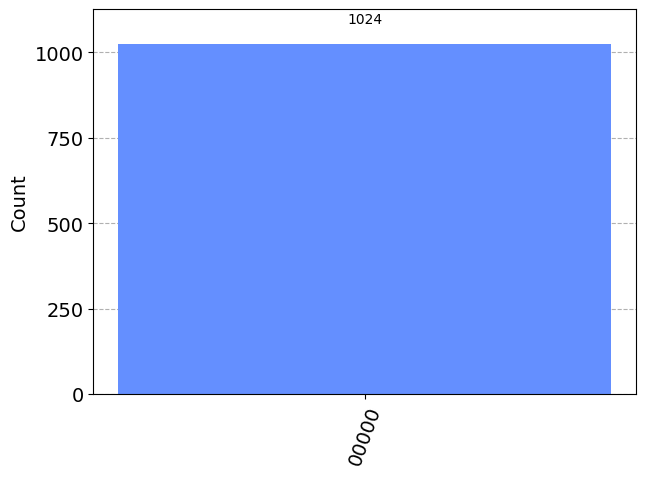

In [1]:
import numpy as np
from qiskit import QuantumCircuit, Aer, transpile, assemble
from qiskit.visualization import plot_histogram
from qiskit.circuit.random import random_circuit

def dj_oracle(case, n):
    # Kvantum áramkört kell létrehoznunk, amit visszaadunk
    # Ennek az áramkörnek n+1 qbitje van: a bemenet mérete,
    # plusz egy kimeneti kubitu
    oracle_qc = QuantumCircuit(n+1)
    
    # Először foglalkozzunk azokkal az esetekkel, amikor az oracle kiegyensúlyozott
    if case == "balanced":
        # Először generáljunk egy véletlen számot, ami megmondja nekünk, hogy mely CNOT-okat
        # kell X-kapukkal összefonni:
        b = np.random.randint(1,2**n)
        # Ezután formázzuk 'b'-t egy bináris karakterláncra a 'n' hosszúságú, nullákkal kitöltött alakban:
        b_str = format(b, '0'+str(n)+'b')
        # Ezután elhelyezzük az első X-kapukat. A bináris karakterláncunkban minden számjegy
        # egy kubituhoz tartozik, ha a számjegy 0, nem csinálunk semmit, ha 1, akkor
        # alkalmazunk egy X-kaput arra a kubiturára:
        for qubit in range(len(b_str)):
            if b_str[qubit] == '1':
                oracle_qc.x(qubit)
        # CNOT kapukat alkalmazunk minden qbitre, az eredményként kapott kimeneti qbittel
        # mint célponttal:
        for qubit in range(n):
            oracle_qc.cx(qubit, n)
        # Végül elhelyezzük a végső X-kapukat
        for qubit in range(len(b_str)):
            if b_str[qubit] == '1':
                oracle_qc.x(qubit)

    # Az eset, amikor az oracle állandó
    if case == "constant":
        # Először döntsük el, hogy az oracle állandó kimenettel rendelkezik-e
        # (mindig 0 vagy mindig 1)
        output = np.random.randint(2)
        if output == 1:
            oracle_qc.x(n)
    
    oracle_gate = oracle_qc.to_gate()
    oracle_gate.name = "Oracle" # Megjelenítéskor az áramkört megjelenítjük
    return oracle_gate

def dj_algorithm(oracle, n):
    dj_circuit = QuantumCircuit(n+1, n)
    # Állítsuk be a kimeneti qbitet:
    dj_circuit.x(n)
    dj_circuit.h(n)
    # És állítsuk be a bemeneti regisztert:
    for qubit in range(n):
        dj_circuit.h(qubit)
    # Adjuk hozzá az oracle kaput az áramkörünkhöz:
    dj_circuit.append(oracle, range(n+1))
    # Végül végezzük el újra az H-kapukat és mérjük:
    for qubit in range(n):
        dj_circuit.h(qubit)
    
    for i in range(n):
        dj_circuit.measure(i, i)
    
    return dj_circuit

n = 5
oracle_gate = dj_oracle('constant', n)
dj_circuit = dj_algorithm(oracle_gate, n)

aer_sim = Aer.get_backend('aer_simulator')
transpiled_dj_circuit = transpile(dj_circuit, aer_sim)
qobj = assemble(transpiled_dj_circuit)
results = aer_sim.run(transpiled_dj_circuit).result()
counts = results.get_counts()
print(counts)
plot_histogram(counts)

ibmqfactory.load_account:WARNING:2024-01-09 09:57:32,380: Credentials are already in use. The existing account in the session will be replaced.


Legkevésbé leterhelt backend:  ibm_osaka
Job Status: job has successfully run


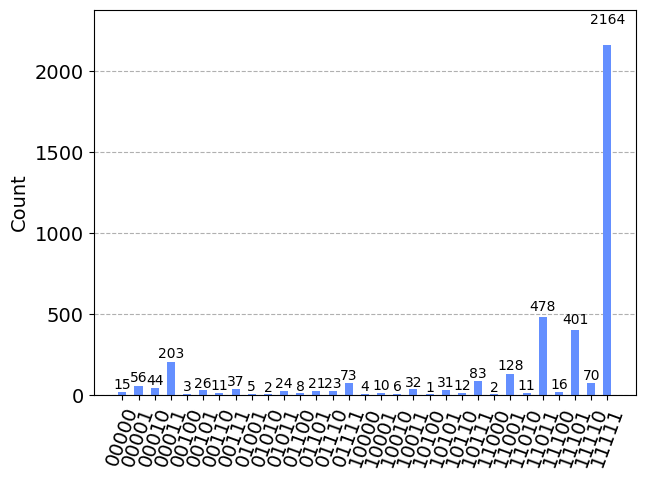

In [20]:
from qiskit import IBMQ, Aer, transpile, assemble
from qiskit.tools.monitor import job_monitor
from qiskit.visualization import plot_histogram
from qiskit.providers.ibmq import least_busy

# Az IBMQ fiókaink betöltése és a legkevésbé leterhelt háttértároló eszköz megszerzése, amelynek (n+1) kubit vagy több van
IBMQ.load_account()
provider = IBMQ.get_provider(hub='ibm-q')
backend = least_busy(provider.backends(filters=lambda x: x.configuration().n_qubits >= (n+1) and
                                   not x.configuration().simulator and x.status().operational==True))
print("Legkevésbé leterhelt backend: ", backend)

# Futtassuk az áramkörünket a legkevésbé leterhelt háttértáron. Figyeljük a feladat végrehajtását a sorban
transpiled_dj_circuit = transpile(dj_circuit, backend, optimization_level=3)
job = backend.run(transpiled_dj_circuit)
job_monitor(job, interval=2)

# eredmények
results = job.result()
answer = results.get_counts()
plot_histogram(answer)


Legkevésbé leterhelt backend:  ibm_osaka
Job Status: job has successfully run


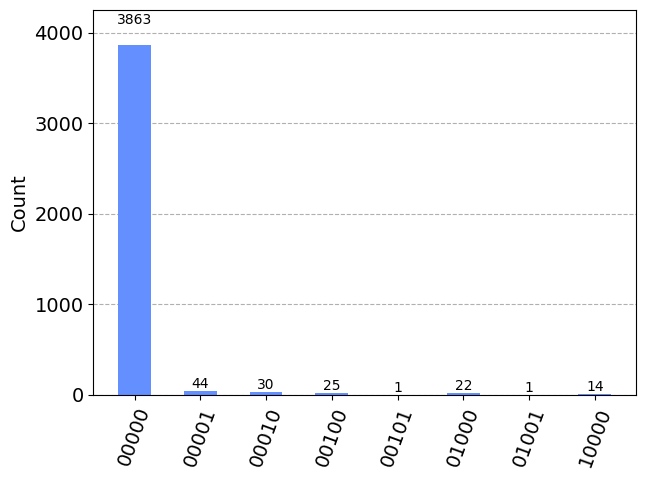

In [8]:
from qiskit import IBMQ, Aer, transpile, assemble
from qiskit.tools.monitor import job_monitor
from qiskit.visualization import plot_histogram
from qiskit.providers.ibmq import least_busy

# Az IBMQ fiókaink betöltése és a legkevésbé leterhelt háttértároló eszköz megszerzése, amelynek (n+1) kubit vagy több van
#IBMQ.load_account()
provider = IBMQ.get_provider(hub='ibm-q')
backend = least_busy(provider.backends(filters=lambda x: x.configuration().n_qubits >= (n+1) and
                                   not x.configuration().simulator and x.status().operational==True))
print("Legkevésbé leterhelt backend: ", backend)

# Futtassuk az áramkörünket a legkevésbé leterhelt háttértáron. Figyeljük a feladat végrehajtását a sorban
transpiled_dj_circuit = transpile(dj_circuit, backend, optimization_level=3)
job = backend.run(transpiled_dj_circuit)
job_monitor(job, interval=2)

# eredmények
results = job.result()
answer = results.get_counts()
plot_histogram(answer)
